# Прототип модели машинного обучения для предприятий золотодобывающей отрасли

**Данные для исследования** — данные с параметрами добычи и очистки (данные находятся в трёх файлах).

**Цель исследования** - подготовить прототип модели машинного обучения для компании «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий. 
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. 

**Ход исследования**

- подготовить данные;
- провести исследовательский анализ данных;
- построить и обучить модель.


**Известно:**

Процесс получения золота из руды: когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

**Стадии получения золота из руды:**

**-  Флотация**
 
Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**- Очистка**
  
Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from scipy import stats as st

!pip install jupyter-black
import jupyter_black

jupyter_black.load()

In [2]:
try:
    df_full = pd.read_csv(
        "f:/Users/user/Desktop/Learn/project_FINAL/gold_recovery_full_new.csv"
    )
    df_test = pd.read_csv(
        "f:/Users/user/Desktop/Learn/project_FINAL/gold_recovery_test_new.csv"
    )
    df_train = pd.read_csv(
        "f:/Users/user/Desktop/Learn/project_FINAL/gold_recovery_train_new.csv"
    )
except:
    df_full = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv"
    )
    df_test = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv"
    )
    df_train = pd.read_csv(
        "https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv"
    )

## Подготовка данных

### Общая информация о датафреймах

**Ознакомимся с общей информацией о полученных датафреймах.**

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


**В датафрейме `df_full` 87 cтолбцов и 19439 строк.
У столбца `data` указан типа данных object.
В данных присутствуют пропущенные значения.**

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

**В датафрейме `df_test` 53 столбца и 5290 строк.
У столбца `data` указан типа данных object.
В данных присутствуют пропущенные значения.**

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


**В датафрейме `df_train` 87 столбцов и 14148 строк.
У столбца `data` указан типа данных object.
В данных присутствуют пропущенные значения.**

Посмотрим на первые пять строк датафреймов.

In [7]:
df_full.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
df_train.head(5)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
df_test.head(5)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


**Проверим наличие явных дубликатов в данных.**

In [10]:
df_full.duplicated().sum()

0

In [11]:
df_test.duplicated().sum()

0

In [12]:
df_train.duplicated().sum()

0

Явные дубликаты не выявлены.

**Найдем пропущенные значения в данных.**

In [13]:
# посчитаем количество пропусков
df_full.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_d_air                0
rougher.output.tail_pb                         0
rougher.output.tail_sol                        0
date                                           0
Length: 87, dtype: int64

In [14]:
# посчитаем количество пропусков
df_test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.xanthate                 4
primary_cleaner.input.sulfate                  4
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_a_air       3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank2_b_level     0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank2_a_level     0
date                                           0
rougher.state.floatbank10_e_air                0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.st

In [15]:
# посчитаем количество пропусков
df_train.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64

In [16]:
# оценим пропущенные значения в процентах
df_full.isna().mean().sort_values(ascending=False) * 100

secondary_cleaner.output.tail_sol           8.992232
rougher.input.floatbank11_xanthate          2.330367
rougher.state.floatbank10_e_air             2.242914
primary_cleaner.output.concentrate_sol      1.903390
secondary_cleaner.state.floatbank2_a_air    1.131745
                                              ...   
rougher.state.floatbank10_d_level           0.000000
rougher.state.floatbank10_d_air             0.000000
rougher.output.tail_pb                      0.000000
rougher.output.tail_sol                     0.000000
date                                        0.000000
Length: 87, dtype: float64

In [17]:
# оценим пропущенные значения в процентах
df_test.isna().mean().sort_values(ascending=False) * 100

rougher.input.floatbank11_xanthate            0.472590
rougher.input.feed_sol                        0.396975
secondary_cleaner.state.floatbank3_a_air      0.170132
rougher.input.floatbank11_sulfate             0.151229
primary_cleaner.input.depressant              0.094518
rougher.input.floatbank10_sulfate             0.094518
primary_cleaner.input.xanthate                0.075614
primary_cleaner.input.sulfate                 0.075614
rougher.input.feed_rate                       0.056711
secondary_cleaner.state.floatbank2_a_air      0.056711
secondary_cleaner.state.floatbank2_b_air      0.037807
rougher.input.feed_size                       0.018904
secondary_cleaner.state.floatbank2_b_level    0.000000
rougher.state.floatbank10_f_level             0.000000
rougher.state.floatbank10_f_air               0.000000
secondary_cleaner.state.floatbank3_a_level    0.000000
secondary_cleaner.state.floatbank2_a_level    0.000000
date                                          0.000000
rougher.st

In [18]:
# оценим пропущенные значения в процентах
df_train.isna().mean().sort_values(ascending=False) * 100

secondary_cleaner.output.tail_sol           11.343558
rougher.state.floatbank10_e_air              3.081490
rougher.input.floatbank11_xanthate           3.024949
primary_cleaner.output.concentrate_sol       2.021344
secondary_cleaner.state.floatbank2_a_air     1.533677
                                              ...    
rougher.output.concentrate_pb                0.000000
rougher.output.concentrate_au                0.000000
rougher.output.recovery                      0.000000
rougher.output.tail_pb                       0.000000
date                                         0.000000
Length: 87, dtype: float64

**Визуализируем пропуски с помощью библиотеки missingno.**

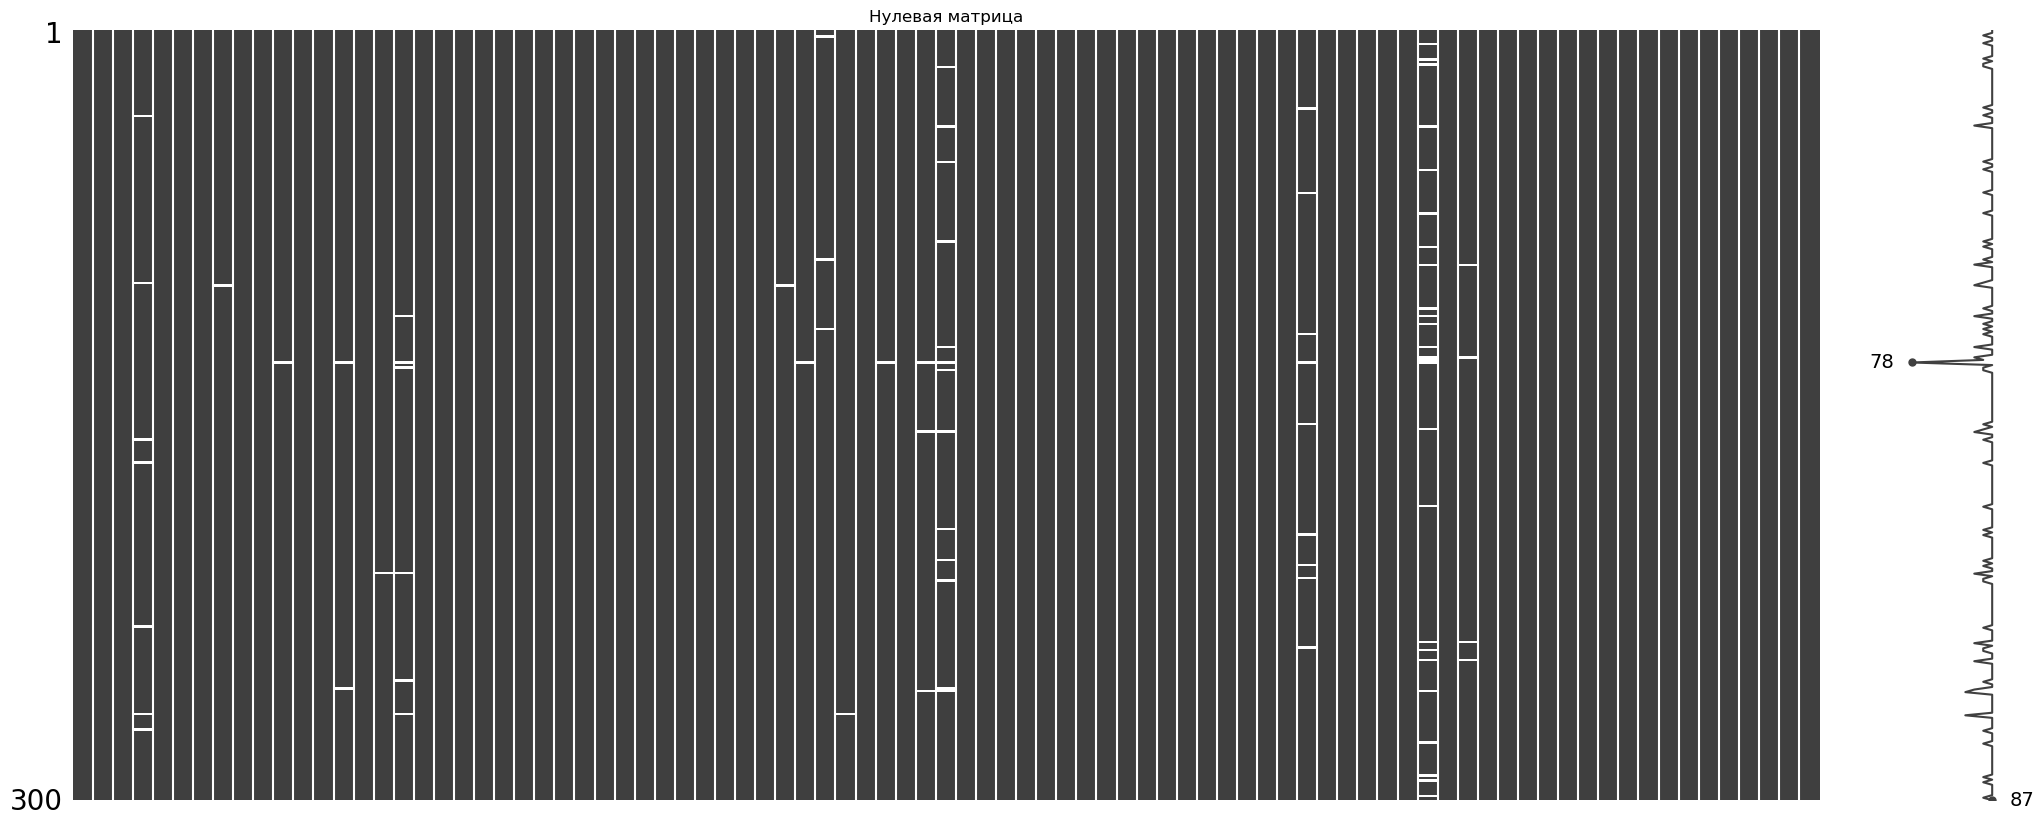

In [19]:
%matplotlib inline
msno.matrix(df_full.sample(300))
plt.title("Нулевая матрица")
plt.show()

**При первом знакомстве с данными выявлено:**

- в датафрейме `df_full` 87 cтолбцов и 19439 строк;
- в датафрейме `df_train` 87 столбцов и 14148 строк;
- в датафрейме `df_test` 53 столбца и 5290 строк;
- в столбца data указан типа данных object;
- явные дубликаты не выявлены;
- в данных присутствуют пропущенные значения: большая часть в `df_full` и в `df_train`.

### Проверка эффективности обогащения

Проверим данные эффективности обогащения в столбце `df_train['rougher.output.recovery']` на корректность. Их можно рассчитать по формуле из прочих имеющихся у нас данных:


**Recovery = C×(F−T) / F×(C−T) ×100**


С — это столбец  `df_train['rougher.output.concentrate_au']`,

F — это столбец `df_train['rougher.input.feed_au]`,

T — это столбец `df_train['rougher.output.tail_au']`.


In [20]:
# подставим значения в формулу
calculated_values = (
    (
        df_train["rougher.output.concentrate_au"]
        * (df_train["rougher.input.feed_au"] - df_train["rougher.output.tail_au"])
    )
    / (
        df_train["rougher.input.feed_au"]
        * (
            df_train["rougher.output.concentrate_au"]
            - df_train["rougher.output.tail_au"]
        )
    )
    * 100
)

In [21]:
# проверим результат
calculated_values

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

Найдем среднее абсолютное отклонение (MAE) между расчётами и значением признака.

In [22]:
# используем функцию mean_absolute_error из библиотеки sklearn.metrics
print(
    "MAE = ",
    mean_absolute_error(df_train["rougher.output.recovery"], calculated_values),
)

MAE =  9.73512347450521e-15


**В ходе проверки полученное значение MAE (средней абсолютной ошибки) достаточно мало. Это говорит о том, что формула расчета эффективности обогащения верна.**

### Анализ признаков

**Проанализируем признаки, недоступные в тестовой выборке. Выясним, что это за параметры и к какому типу относятся.**

In [23]:
# сохраним недостающие столбцы в переменную
columns_not_in_test = set(df_train.columns) - set(df_test.columns)

In [24]:
# посмотрим на признаки, которых нет в тестовой выборке
columns_not_in_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [25]:
print("Количество отсутствующих признаков -", len(columns_not_in_test))

Количество отсутствующих признаков - 34


**Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки: в основном это выходные показатели после каждого этапа по каждому из четырех веществ. Также в тестовом наборе нет целевых признаков.**

### Предобработка данных

**В ходе предобработки приведем столбцы `date`к типу to_datetime. Заменим пропущенные значения там, где это необходимо.**

In [26]:
# создадим функцию, которая изменит тип данных в `date`
def date_columns(df_full, df_train, df_test):
    for df in [df_full, df_train, df_test]:
        for column in df:
            if "date" in column:
                df[column] = pd.to_datetime(df[column])

    return df_full, df_train, df_test

In [27]:
df_full, df_train, df_test = date_columns(df_full, df_train, df_test)

**Соседние по времени параметры часто похожи, поэтому заменим пропущенные значения в датафреймах методом ffil(). Он берёт последнее значение, предшествующее нулевому, и заполняет им пропуски.**

In [28]:
df_train = df_train.ffill()
df_test = df_test.ffill()
df_full = df_full.ffill()

In [29]:
# проверим результат
df_full.isna().sum().sort_values(ascending=False)

date                                          0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
                                             ..
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_b_air        0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [30]:
# проверим результат
df_train.isna().sum().sort_values(ascending=False)

date                                          0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_e_air               0
                                             ..
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_b_air        0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [31]:
# проверим результат
df_test.isna().sum().sort_values(ascending=False)

date                                          0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level             0
secondary_cleaner.state.floatbank2_a_air      0
secondary_cleaner.state.floatbank2_a_level    0
secondary_cleaner.state.floatbank2_b_air      0
secondary_cleaner.state.floatbank2_b_level    0
secondary_cleaner.state.floatbank3_a_air      0
secondary_cleaner.state.floatbank3_a_level    0
secondary_cleaner.state.floatbank3_b_air      0
secondary_cleaner.state.floatbank3_b_level    0
secondary_cleaner.state.floatbank4_a_air      0
secondary_cleaner.state.floatbank4_a_level    0
secondary_cleaner.state.floatbank4_b_air      0
secondary_cleaner.state.floatbank4_b_level    0
secondary_cleaner.state.floatbank5_a_air

**В ходе предобработки:**

- столбцы `date`в датафреймах приведены к типу to_datetime;
- пропущенные значения заменены методом ffil().

## Анализ данных

**Проанализируем имеющиеся данные о концентрации металлов на различных этапах процесса очистки. Сравним распределение размеров гранул сырья. Выясним концентрацию всех веществ на разных этапах очистки.**

### Концентрация металлов на различных этапах очистки

Выясним, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

**Построим график распределения доли золота (Au) после этапов флотации, первичной очистки и в финальном концентрате.**

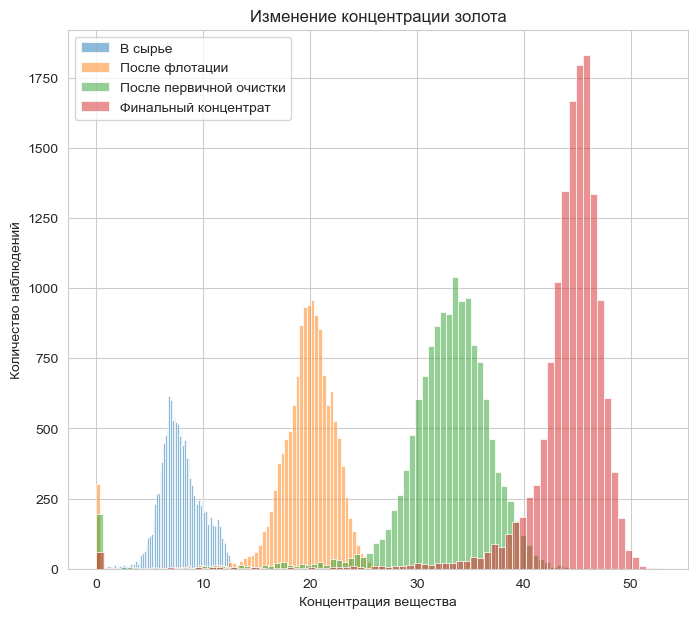

In [32]:
plt.figure(figsize=(8, 7))
sns.set_style("whitegrid")
sns.histplot(
    df_train["rougher.input.feed_au"],
    bins=80,
    label="В сырье",
    alpha=0.5,
)
sns.histplot(
    df_train["rougher.output.concentrate_au"],
    bins=80,
    label="После флотации",
    alpha=0.5,
)
sns.histplot(
    df_train["primary_cleaner.output.concentrate_au"],
    bins=80,
    label="После первичной очистки",
    alpha=0.5,
)
sns.histplot(
    df_train["final.output.concentrate_au"],
    bins=80,
    label="Финальный концентрат",
    alpha=0.5,
)


plt.title("Изменение концентрации золота")
plt.legend(loc="upper left", fontsize="medium")
plt.xlabel("Концентрация вещества")
plt.ylabel("Количество наблюдений")
plt.show()

**Из графика видно, что с каждым этапом концентрация золота увеличивается и достигает максимальных значений в финальном концентрате.**
Так же на графике заметны выбросы с нулевыми значениями.

**Построим график распределения доли серебра (Ag) после этапов флотации, первичной очистки и в финальном концентрате.**

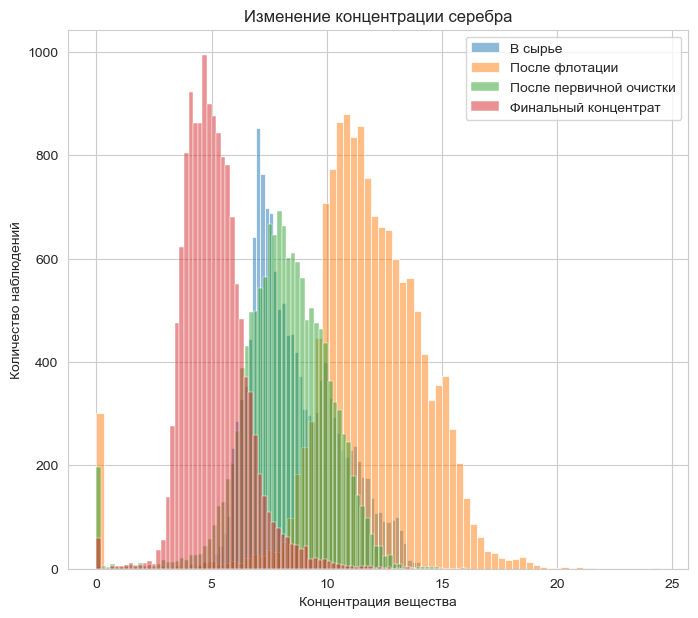

In [33]:
plt.figure(figsize=(8, 7))
sns.set_style("whitegrid")
sns.histplot(
    df_train["rougher.input.feed_ag"],
    bins=80,
    label="В сырье",
    alpha=0.5,
)
sns.histplot(
    df_train["rougher.output.concentrate_ag"],
    bins=80,
    label="После флотации",
    alpha=0.5,
)
sns.histplot(
    df_train["primary_cleaner.output.concentrate_ag"],
    bins=80,
    label="После первичной очистки",
    alpha=0.5,
)
sns.histplot(
    df_train["final.output.concentrate_ag"],
    bins=80,
    label="Финальный концентрат",
    alpha=0.5,
)

plt.title("Изменение концентрации серебра")
plt.legend(loc="upper right", fontsize="medium")
plt.xlabel("Концентрация вещества")
plt.ylabel("Количество наблюдений")
plt.show()

**Из графика видно, что концентрация серебра в сырье примерно на том же уровне, что и после первичной очистки. Затем заметно снижается после каждого этапа очистки и в финальном концентрате доля серебра ниже, чем после предыдущих этапов.**
Так же на графике заметны выбросы с нулевыми значениями.

**Построим график распределения доли свинца (Pb) после этапов флотации, первичной очистки и в финальном концентрате.**

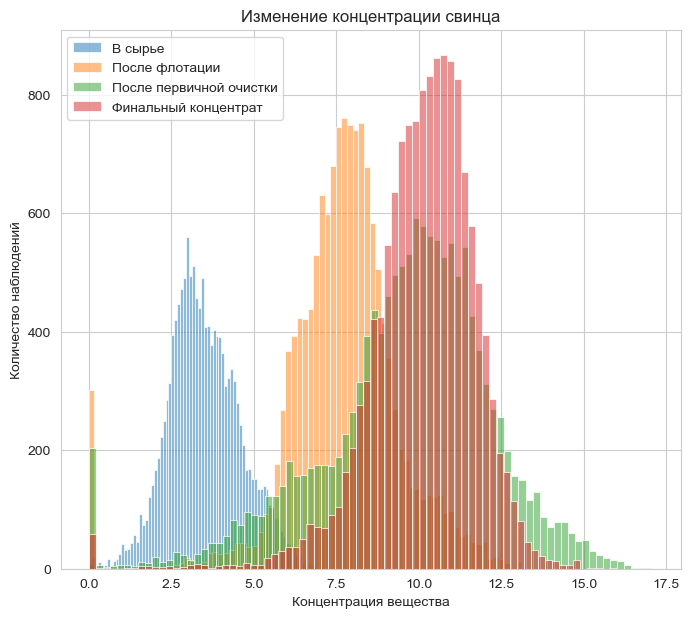

In [34]:
plt.figure(figsize=(8, 7))
sns.set_style("whitegrid")
sns.histplot(
    df_train["rougher.input.feed_pb"],
    bins=80,
    label="В сырье",
    alpha=0.5,
)
sns.histplot(
    df_train["rougher.output.concentrate_pb"],
    bins=80,
    label="После флотации",
    alpha=0.5,
)
sns.histplot(
    df_train["primary_cleaner.output.concentrate_pb"],
    bins=80,
    label="После первичной очистки",
    alpha=0.5,
)
sns.histplot(
    df_train["final.output.concentrate_pb"],
    bins=80,
    label="Финальный концентрат",
    alpha=0.5,
)

plt.title("Изменение концентрации свинца")
plt.legend(loc="upper left", fontsize="medium")
plt.xlabel("Концентрация вещества")
plt.ylabel("Количество наблюдений")
plt.show()

**Из графика видно, что концентрация свинца в сырье достаточно низкая, после первичной очистки и в финальном концентрате практически одинаковая.**
Так же на графике заметны выбросы с нулевыми значениями.

**Анализа концетрации всех веществ на разных этапах очистки показал, что у каждого вещества свои особенности в ходе обработки (от сырья до финального концентрата):**

- концентрация золота увеличивается и достигает максимальных значений в финальном концентрате;
- концентрация серебра заметно снижается после каждого этапа очистки и в финальном концентрате доля серебра ниже, чем после предыдущих этапов;
- концентрация свинца после первичной очистки и в финальном концентрате практически одинаковая.

**Удалим все нулевые значения в столбцах обучающей выборки.**

In [35]:
df_train = df_train[
    (df_train["rougher.output.concentrate_au"] != 0)
    & (df_train["final.output.concentrate_au"] != 0)
    & (df_train["primary_cleaner.output.concentrate_au"] != 0)
]

In [36]:
df_train = df_train[
    (df_train["rougher.output.concentrate_ag"] != 0)
    & (df_train["final.output.concentrate_ag"] != 0)
    & (df_train["primary_cleaner.output.concentrate_ag"] != 0)
]

In [37]:
df_train = df_train[
    (df_train["rougher.output.concentrate_sol"] != 0)
    & (df_train["final.output.concentrate_sol"] != 0)
    & (df_train["primary_cleaner.output.concentrate_sol"] != 0)
]

In [38]:
df_train = df_train[
    (df_train["rougher.output.concentrate_pb"] != 0)
    & (df_train["final.output.concentrate_pb"] != 0)
    & (df_train["primary_cleaner.output.concentrate_pb"] != 0)
]

In [39]:
# проверим результат
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13716 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                13716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         13716 non-null  float64       
 2   final.output.concentrate_pb                         13716 non-null  float64       
 3   final.output.concentrate_sol                        13716 non-null  float64       
 4   final.output.concentrate_au                         13716 non-null  float64       
 5   final.output.recovery                               13716 non-null  float64       
 6   final.output.tail_ag                                13716 non-null  float64       
 7   final.output.tail_pb                                13716 non-null  float64       
 8   final.outpu

### Сравнение распределения размеров гранул сырья

**Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет 
неправильной.**

Построим нормированные гистограммы для столбца `rougher.input.feed_size` в обучающей и тествовой выборках.

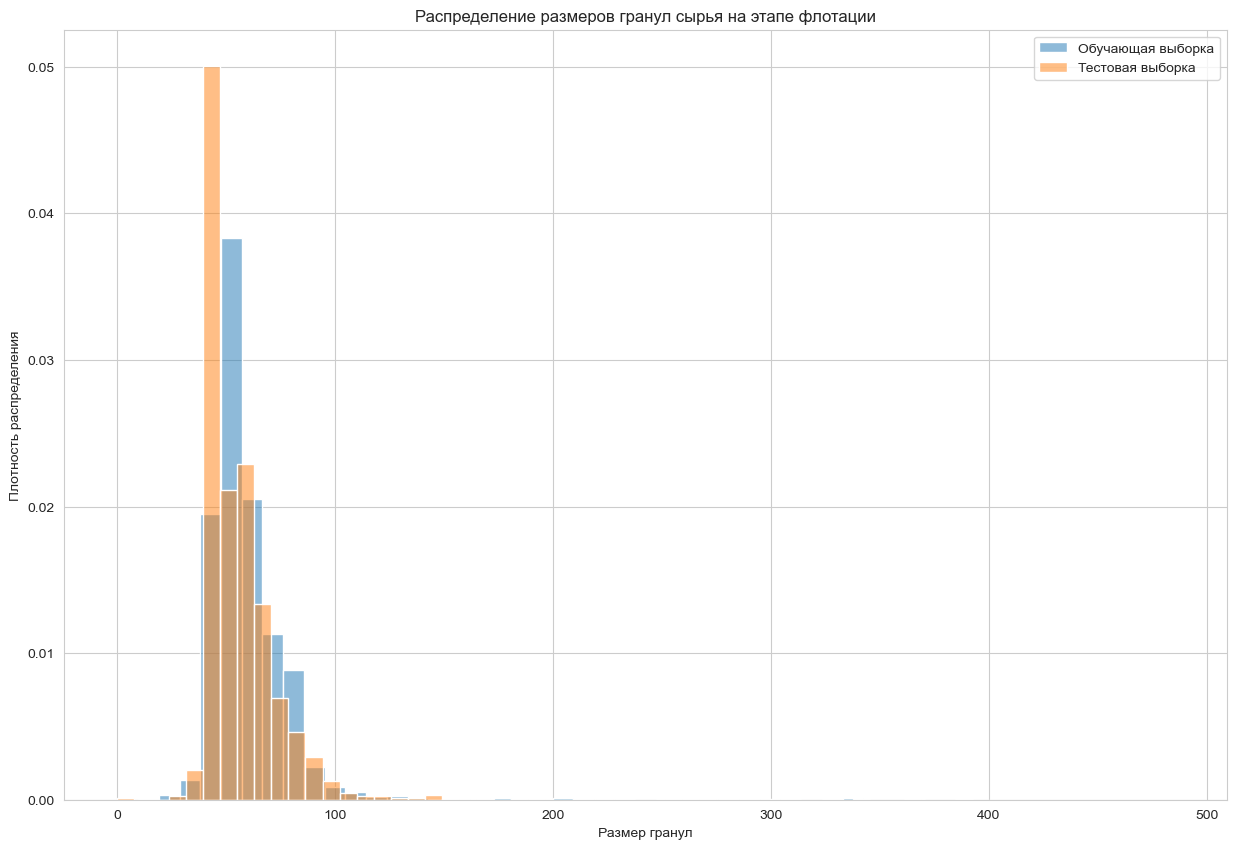

In [40]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.histplot(
    df_train["rougher.input.feed_size"],
    bins=50,
    label="Обучающая выборка",
    alpha=0.5,
    stat="density",
    common_norm=False,
)
sns.histplot(
    df_test["rougher.input.feed_size"],
    bins=50,
    label="Тестовая выборка",
    alpha=0.5,
    stat="density",
    common_norm=False,
)
plt.legend(loc="upper right", fontsize="medium")
plt.title("Распределение размеров гранул сырья на этапе флотации")
plt.xlabel("Размер гранул")
plt.ylabel("Плотность распределения")
plt.show()

**Из графика видно, что на этапе флотации распределения не столь значительно отличаются друг от друга.**


Для подтверждения найдем разность средних значений и относительную разность размера гранул на этапе флотации в обучающей и тестовой выборках.

In [41]:
dif_avg = (
    df_train["rougher.input.feed_size"].mean()
    - df_test["rougher.input.feed_size"].mean()
)

In [42]:
rel_dif_avg = dif_avg / df_train["rougher.input.feed_size"].mean()

In [43]:
print("Разность средних", dif_avg.round(2))
print("Относительная разность средних", rel_dif_avg.round(2))

Разность средних 4.37
Относительная разность средних 0.07


**Так же построим нормированные гистограммы для столбца `primary_cleaner.input.feed_size` в обучающей и тествовой выборках.**

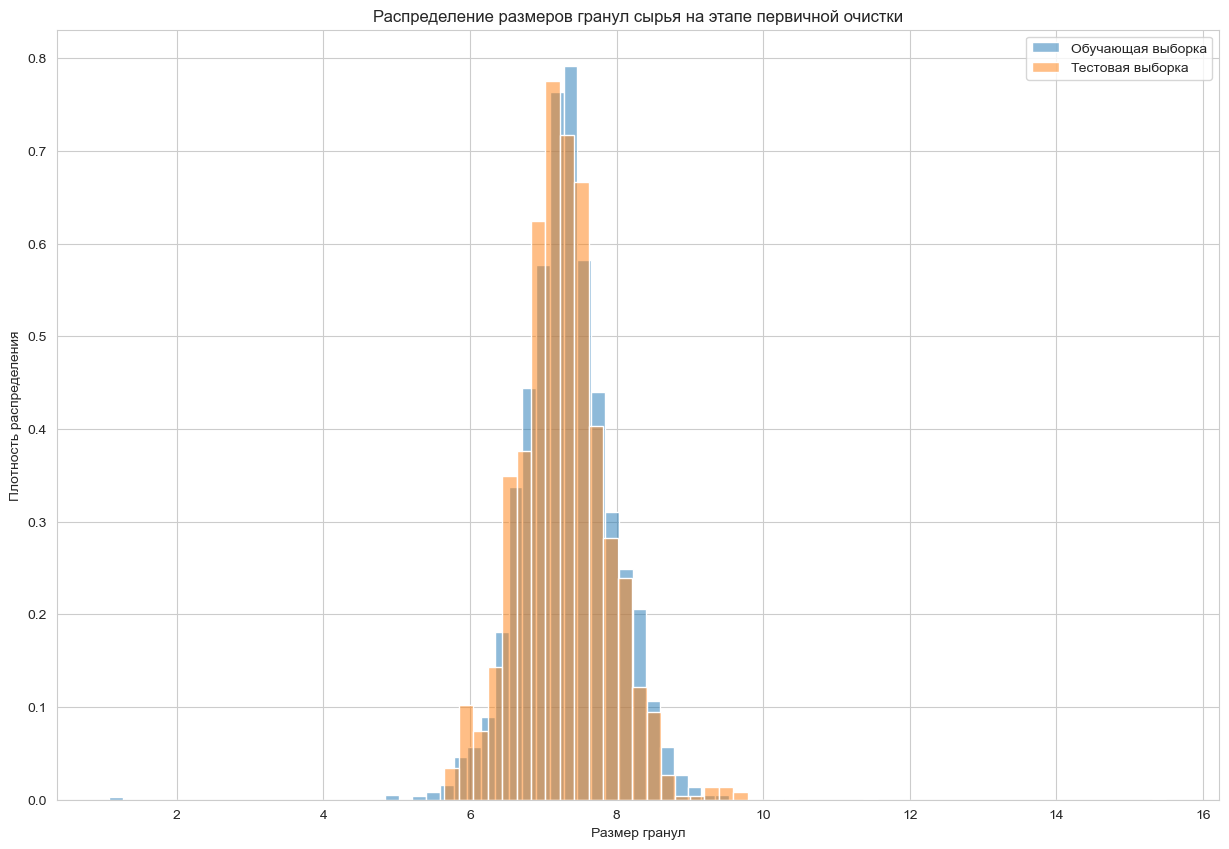

In [44]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.histplot(
    df_train["primary_cleaner.input.feed_size"],
    bins=50,
    label="Обучающая выборка",
    alpha=0.5,
    stat="density",
    common_norm=False,
)
sns.histplot(
    df_test["primary_cleaner.input.feed_size"],
    bins=50,
    label="Тестовая выборка",
    alpha=0.5,
    stat="density",
    common_norm=False,
)
plt.legend(loc="upper right", fontsize="medium")
plt.title("Распределение размеров гранул сырья на этапе первичной очистки")
plt.xlabel("Размер гранул")
plt.ylabel("Плотность распределения")
plt.show()

**Из графика видно, что на этапе первичной очистки распределения практически не отличаются друг от друга.**


Для подтверждения найдем разность средних значений и относительную разность размера гранул на этапе первичной очистки в обучающей и тестовой выборках.

In [45]:
dif_avg = (
    df_train["primary_cleaner.input.feed_size"].mean()
    - df_test["primary_cleaner.input.feed_size"].mean()
)

In [46]:
rel_dif_avg = dif_avg / df_train["primary_cleaner.input.feed_size"].mean()

In [47]:
print("Разность средних", dif_avg.round(2))
print("Относительная разность средних", rel_dif_avg.round(2))

Разность средних 0.06
Относительная разность средних 0.01


**Распределения отличаются незначительно, что дает право предполагать, что оценка модели будет правильной.**

Вычисления разности средних и относительной разности показало, что средний размер гранул в выборках на этапе флотации различается примерно на 7%, а на этапе первичной очистки всего в 1%. Поскольку уточнить этото показатель у нас нет возможности, будем полагать, что эта разница допустима.

### Cуммарная концентрация всех веществ

**Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.**

Для определения суммарной концентрации найдем все столбцы, содержащие данные `[этап].output.concentrate_[элемент]`.

In [48]:
# Найдем столбцы, в названиях которых есть "output.concentrate"
sum_columns = df_train.columns[df_train.columns.str.contains("output.concentrate")]

In [49]:
sum_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
       'rougher.output.concentrate_sol', 'rougher.output.concentrate_au'],
      dtype='object')

**Создадим переменные по каждому этапу и веществам.**

In [50]:
# добавим столбцы с содержанием веществ в сырье
sum_rougher_input = (
    df_train["rougher.input.feed_ag"]
    + df_train["rougher.input.feed_pb"]
    + df_train["rougher.input.feed_au"]
    + df_train["rougher.input.feed_sol"]
)

In [51]:
sum_rougher = (
    df_train["rougher.output.concentrate_ag"]
    + df_train["rougher.output.concentrate_pb"]
    + df_train["rougher.output.concentrate_sol"]
    + df_train["rougher.output.concentrate_au"]
)

In [52]:
sum_primary = (
    df_train["primary_cleaner.output.concentrate_ag"]
    + df_train["primary_cleaner.output.concentrate_pb"]
    + df_train["primary_cleaner.output.concentrate_sol"]
    + df_train["primary_cleaner.output.concentrate_au"]
)

In [53]:
sum_final = (
    df_train["final.output.concentrate_ag"]
    + df_train["final.output.concentrate_pb"]
    + df_train["final.output.concentrate_sol"]
    + df_train["final.output.concentrate_au"]
)

**Построим график распределения суммарной концентрации всех веществ.**

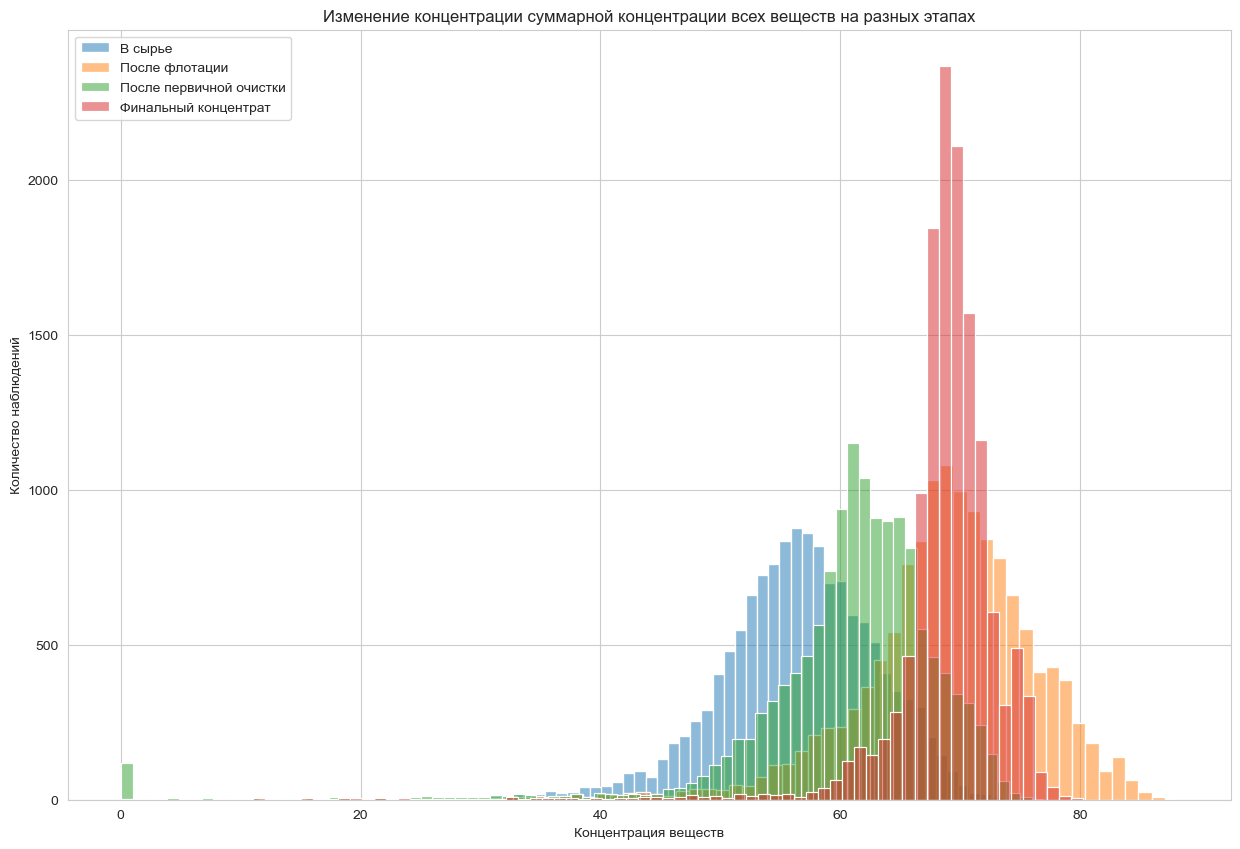

In [54]:
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.histplot(sum_rougher_input, bins=80, label="В сырье", alpha=0.5)
sns.histplot(sum_rougher, bins=80, label="После флотации", alpha=0.5)
sns.histplot(sum_primary, bins=80, label="После первичной очистки", alpha=0.5)
sns.histplot(sum_final, bins=80, label="Финальный концентрат", alpha=0.5)
plt.title("Изменение концентрации суммарной концентрации всех веществ на разных этапах")
plt.legend(loc="upper left", fontsize="medium")
plt.xlabel("Концентрация веществ")
plt.ylabel("Количество наблюдений")
plt.show()

**Из графика видим, что суммарная концентрация всех веществ наиболее высокая после флотации и в финальном концентрате.**

## Построение модели

**Подготовим данные для обучения. Обучим разные модели эффективности обогащения чернового и финального этапов, оценим их качество. Выберем лучшую модель и проверим её на тестовой выборке.**

### Подготовка данных для построения модели

**На этапе предобработки было обнаружено, что в тестовой выборке отсутствуют целевые признаки и стобец `date`, по которому можно произвести объединение. Добавим их в `df_test` методом merge().**

In [55]:
# добавим к тестовой выборке целевые признаки по столбцу с датой
df_test = df_test.merge(
    df_full[["date", "rougher.output.recovery", "final.output.recovery"]],
    how="left",
    on="date",
)

In [56]:
# проверим результат
columns_not_in_test2 = set(df_train.columns) - set(df_test.columns)

In [57]:
len(columns_not_in_test2)

32

**Все верно: в тестовой выборке отсутствует уже 32 признака. Удалим их из обучающего датасета.**

In [58]:
df_train = df_train.drop(columns=columns_not_in_test2, axis=1)

In [59]:
# проверим результат
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13716 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        13716 non-null  datetime64[ns]
 1   final.output.recovery                       13716 non-null  float64       
 2   primary_cleaner.input.sulfate               13716 non-null  float64       
 3   primary_cleaner.input.depressant            13716 non-null  float64       
 4   primary_cleaner.input.feed_size             13716 non-null  float64       
 5   primary_cleaner.input.xanthate              13716 non-null  float64       
 6   primary_cleaner.state.floatbank8_a_air      13716 non-null  float64       
 7   primary_cleaner.state.floatbank8_a_level    13716 non-null  float64       
 8   primary_cleaner.state.floatbank8_b_air      13716 non-null  float64       
 9   primary_cle

В обучающей выборке осталось 55 столбцов вместо 87.

In [60]:
# проверим результат: еще раз сравним столбцы обучающей и тестовой выборок
columns_not_in_test = set(df_train.columns) - set(df_test.columns)

In [61]:
len(columns_not_in_test)

0

Удалим из всех датафреймов столбец с датой.

In [62]:
# удалим столбцы date из всех датафреймов
df_full = df_full.drop("date", axis=1)
df_train = df_train.drop("date", axis=1)
df_test = df_test.drop("date", axis=1)

**Подготовили данные к обучению:**


- добавили к тестовой выборке целевые признаки из df_full;
- удалили признаки из обучающего датасета, которых нет в тестовой выборке;
- удалили столбец `date` из всех датафреймов.

### Функция для вычисления итоговой sMAPE

**Введём новую метрику качества — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»).**

Она одинаково учитывает масштаб и целевого признака, и предсказания.

In [63]:
# напишем функцию для вычисления sMAPE
def smape(target, predict):
    smape = (
        (1 / len(target))
        * np.sum((np.abs(target - predict)) / ((np.abs(target) + np.abs(predict)) / 2))
        * 100
    )
    return smape

In [64]:
# с помощью функции make_scorer() создадим метрику для оценки точности предсказания
smape_scorer = make_scorer(smape, greater_is_better=False)

In [65]:
# напишем функцию для вычисления итоговой sMAPE
def final_smape(rougher, final):
    final = 0.25 * rougher + 0.75 * final
    return final

**Подготовили функцию для будущего вычисления итоговой метрики качества sMAPE.**

### Построение моделей

**Напомним, что целевых признаков два:** 

1. Эффективность обогащения чернового концентрата `rougher.output.recovery`

2. Эффективность обогащения финального концентрата `final.output.recovery`

   

Для обучения и теста будут использоваться одни и те же признаки, но разные целевые признаки.

In [66]:
# запишем в переменные
features_x_train = df_train.drop(
    ["rougher.output.recovery", "final.output.recovery"], axis=1
)
target_for_rougher_y_train = df_train["rougher.output.recovery"]
target_for_final_y_train = df_train["final.output.recovery"]

In [67]:
# проверим результат
features_x_train.shape, target_for_rougher_y_train.shape, target_for_final_y_train.shape

((13716, 52), (13716,), (13716,))

В переменной **features_x_train** сохранили все признаки, за исключением целевого.

В переменных **target_for_rougher_y_train** и **target_for_final_y_train** сохранили целевые признаки.

Данные готовы для построения моделей.

### Модель Дерево решений

**Дерево решений (DecisionTreeRegressor)**

Построим модель Дерево решений и оценим качество модели метрикой sMAPE с помощью кросс-валидации.

In [68]:
best_result_dectree = 1000
best_depth_dectree = 0

for depth in range(1, 15, 2):  # максимальная глубина от 1 до 15 с шагом 2

    model_dectree_rougher = DecisionTreeRegressor(
        random_state=12345, max_depth=depth
    )  # cоздаем модель, указав max_depth=depth
    smape_rougher = cross_val_score(
        model_dectree_rougher,
        features_x_train,
        target_for_rougher_y_train,
        scoring=smape_scorer,
        cv=5,
    ).mean()  # проверим качество модели эффективности обогащения чернового концентрата кросс-валидацией

    model_dectree_final = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    smape_final = cross_val_score(
        model_dectree_final,
        features_x_train,
        target_for_final_y_train,
        scoring=smape_scorer,
        cv=5,
    ).mean()  # проверим качество модели эффективности обогащения финального концентрата кросс-валидацией

    result_smape = final_smape(smape_rougher, smape_final) * (
        -1
    )  # передадим полученные sMAPE по каждому целевому признаку в функцию подсчета итогового sMAPE

    if result_smape < best_result_dectree:
        best_result_dectree = result_smape
        best_depth_dectree = depth

print(
    "sMAPE наилучшей модели Дерева решений по кросс-валидации:",
    best_result_dectree.round(2),
    "Глубина дерева:",
    best_depth_dectree,
)

sMAPE наилучшей модели Дерева решений по кросс-валидации: 8.89 Глубина дерева: 3


Оценим качество модели метрикой sMAPE с помощью инструмента автоматизированного подбора гиперпараметров GridSearchCV.

In [69]:
# параметры для GridSearchCV
param_grid = {"max_depth": range(1, 15, 2)}  # максимальная глубина от 1 до 15 с шагом 2

# создаем модель
model_dectree = DecisionTreeRegressor(random_state=12345)

# создаем объект GridSearchCV для подбора гиперпараметров rougher
grid_search_rougher = GridSearchCV(
    model_dectree,
    param_grid,
    scoring=smape_scorer,
    cv=5,
    n_jobs=-1,
)

# подбор гиперпараметров для модели rougher
grid_search_rougher.fit(features_x_train, target_for_rougher_y_train)

# получаем лучшие параметры и результат для rougher
best_depth_dectree_rougher = grid_search_rougher.best_params_["max_depth"]
best_result_dectree_rougher = -grid_search_rougher.best_score_

# создаем объект GridSearchCV для подбора гиперпараметров final
grid_search_final = GridSearchCV(
    model_dectree, param_grid, scoring=smape_scorer, cv=5, n_jobs=-1
)

# подбор гиперпараметров для final
grid_search_final.fit(features_x_train, target_for_final_y_train)

# получаем лучшие параметры и результат для final
best_depth_dectree_final = grid_search_final.best_params_["max_depth"]
best_result_dectree_final = -grid_search_final.best_score_

# подсчет итогового sMAPE
result_smape = final_smape(best_result_dectree_rougher, best_result_dectree_final)

print(
    "sMAPE наилучшей модели Дерева решений:",
    result_smape.round(2),
    "Глубина дерева для rougher:",
    best_depth_dectree_rougher,
    "Глубина дерева для final:",
    best_depth_dectree_final,
)

sMAPE наилучшей модели Дерева решений: 8.89 Глубина дерева для rougher: 3 Глубина дерева для final: 3


### Модель Случайный лес 

**Случайный лес (RandomForestRegressor)**

Постороим модель Случайный лес и оценим качество модели метрикой sMAPE с помощью кросс-валидации.

In [70]:
best_result_ranfor = 1000
best_est_ranfor = 0
best_depth_ranfor = 0

for est in range(10, 31, 10):  # количество деревьев: от 10 до 30 с шагом 10
    for depth in range(2, 11, 2):  # максимальная глубина от 2 до 10 с шагом 2

        model_ranfor_rougher = RandomForestRegressor(
            random_state=12345, n_estimators=est, max_depth=depth
        )
        smape_rougher = cross_val_score(
            model_ranfor_rougher,
            features_x_train,
            target_for_rougher_y_train,
            scoring=smape_scorer,
            cv=5,
        ).mean()  # проверим качество модели эффективности обогащения чернового концентрата кросс-валидацией

        model_ranfor_final = RandomForestRegressor(
            random_state=12345, n_estimators=est, max_depth=depth
        )
        smape_final = cross_val_score(
            model_ranfor_final,
            features_x_train,
            target_for_final_y_train,
            scoring=smape_scorer,
            cv=5,
        ).mean()  # проверим качество модели эффективности обогащения финального концентрата кросс-валидацией

        result_smape = final_smape(smape_rougher, smape_final) * (
            -1
        )  # передадим полученные sMAPE по каждому целевому признаку в функцию подсчета итогового sMAPE

        if result_smape < best_result_ranfor:
            best_result_ranfor = result_smape
            best_est_ranfor = est
            best_depth_ranfor = depth

print(
    "sMAPE наилучшей модели Случайный лес по кросс-валидации:",
    best_result_ranfor.round(2),
    "Количество деревьев:",
    best_est_ranfor,
    "Максимальная глубина:",
    best_depth_ranfor,
)

sMAPE наилучшей модели Случайный лес по кросс-валидации: 8.44 Количество деревьев: 10 Максимальная глубина: 4


Оценим качество модели метрикой sMAPE с помощью инструмента автоматизированного подбора гиперпараметров GridSearchCV.

In [71]:
# Определяем параметры для GridSearchCV
param_grid = {
    "n_estimators": range(10, 31, 10),  # количество деревьев: от 10 до 30 с шагом 10
    "max_depth": range(2, 11, 2),  # максимальная глубина от 2 до 10 с шагом 2
}

# Создаем модель
model_ranfor = RandomForestRegressor(random_state=12345)

# Создаем объект GridSearchCV для подбора гиперпараметров
grid_search_rougher = GridSearchCV(
    model_ranfor,
    param_grid,
    scoring=smape_scorer,
    cv=5,
    n_jobs=-1,  # Используем все доступные ядра для ускорения процесса
)

# Подбор гиперпараметров для модели rougher
grid_search_rougher.fit(features_x_train, target_for_rougher_y_train)

# Получаем лучшие параметры и результат для rougher
best_est_ranfor = grid_search_rougher.best_params_["n_estimators"]
best_depth_ranfor = grid_search_rougher.best_params_["max_depth"]
best_result_ranfor_rougher = -grid_search_rougher.best_score_

# Повторяем процесс для финальной модели
grid_search_final = GridSearchCV(
    model_ranfor, param_grid, scoring=smape_scorer, cv=5, n_jobs=-1
)

# Подбор гиперпараметров для финальной модели
grid_search_final.fit(features_x_train, target_for_final_y_train)

# Получаем лучшие параметры и результат для final
best_est_ranfor_final = grid_search_final.best_params_["n_estimators"]
best_depth_ranfor_final = grid_search_final.best_params_["max_depth"]
best_result_ranfor_final = -grid_search_final.best_score_

# Подсчет итогового sMAPE
result_smape = final_smape(best_result_ranfor_rougher, best_result_ranfor_final)

print(
    "sMAPE наилучшей модели Случайного леса:",
    result_smape.round(2),
    "Количество деревьев:",
    best_est_ranfor,
    "Максимальная глубина:",
    best_depth_ranfor,
)

sMAPE наилучшей модели Случайного леса: 8.42 Количество деревьев: 10 Максимальная глубина: 4


### Модель Линейная регрессия

**Линейная регрессия (LinearRegression)**

Постороим модель Линейная регрессия и оценим качество модели метрикой sMAPE с помощью кросс-валидации.

In [72]:
model_linreg_rougher = (
    LinearRegression()
)  # cоздаем модель эффективности обогащения чернового концентрата
smape_rougher = cross_val_score(
    model_linreg_rougher,
    features_x_train,
    target_for_rougher_y_train,
    scoring=smape_scorer,
    cv=3,
).mean()  # проверим качество модели эффективности обогащения чернового концентрата кросс-валидацией


model_linreg_final = (
    LinearRegression()
)  # cоздаем модель для эффективности обогащения финального концентрата
smape_final = cross_val_score(
    model_linreg_final,
    features_x_train,
    target_for_final_y_train,
    scoring=smape_scorer,
    cv=6,
).mean()  # проверим качество модели эффективности обогащения финального концентрата кросс-валидацией


result_smape = final_smape(smape_rougher, smape_final) * (
    -1
)  # передадим полученные sMAPE по каждому целевому признаку в функцию подсчета итогового sMAPE
print(
    "sMAPE наилучшей модели линейной регрессии по кросс-валидации:",
    result_smape.round(2),
)

sMAPE наилучшей модели линейной регрессии по кросс-валидации: 10.76


**Выводы:**

**Качество наилучшей модели Дерево решений по кросс-валидации: 8.89 Глубина дерева: 3;**

**Качество наилучшей модели Случайный лес по кросс-валидации: 8.44 Количество деревьев: 10 Максимальная глубина: 4;**

**Качество наилучшей модели Логическая регрессия по кросс-валидации: 10.76.**

Лучший результ показала модель Случайный лес, затем Дерево решений.

Модель Случайный лес не столь оперативна в рассчетах, поэтому остановимся на моделе Дерево решений.

### Проверка на тестовой выборке

**Проверим на тестовой выборке модель Дерево решений, которая показала лучший результат с глубиной дерева=3.**

В переменной **features_x_test** сохраним все признаки, за исключением целевого.

В переменных **target_for_rougher_y_test** и **target_for_final_y_test** сохраним целевые признаки.

In [73]:
features_x_test = df_test.drop(
    ["rougher.output.recovery", "final.output.recovery"], axis=1
)
target_for_rougher_y_test = df_test["rougher.output.recovery"]
target_for_final_y_test = df_test["final.output.recovery"]

In [74]:
# проверим результат
features_x_test.shape, target_for_rougher_y_test.shape, target_for_final_y_test.shape

((5290, 52), (5290,), (5290,))

In [75]:
model_test_rougher = DecisionTreeRegressor(random_state=12345, max_depth=3)
model_test_rougher.fit(features_x_test, target_for_rougher_y_test)
predicted_rougher = model_test_rougher.predict(features_x_test)

model_test_final = DecisionTreeRegressor(random_state=12345, max_depth=3)
model_test_final.fit(features_x_test, target_for_final_y_test)
predicted_final = model_test_final.predict(features_x_test)

smape_test_rougher = smape(target_for_rougher_y_test, predicted_rougher)
smape_test_final = smape(target_for_final_y_test, predicted_final)
final_smape_test = final_smape(smape_test_rougher, smape_test_final)

print(
    "sMAPE по тестовой выборке:",
    final_smape_test.round(2),
)

sMAPE по тестовой выборке: 8.04


**В результате проверки получена sMAPE по тестовой выборке: 8.04.**

**Проверим модель на константной модели с помощью инструмента DummyRegressor.**

In [76]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_x_train, target_for_rougher_y_train)
dummy_regr_for_final.fit(features_x_train, target_for_final_y_train)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_x_test)
dummy_predicted_final = dummy_regr_for_final.predict(features_x_test)

smape_for_const_rougher = smape(target_for_rougher_y_test, dummy_predicted_rougher)
smape_for_const_final = smape(target_for_final_y_test, dummy_predicted_final)

final_smape_for_const = final_smape(smape_for_const_rougher, smape_for_const_final)

In [77]:
print("sMAPE для константной модели:", final_smape_for_const.round(2))

sMAPE для константной модели: 9.83


**Анализ результатов обучения:**

**sMAPE по кросс-валидации: 8.44**
Показатель указывает на то, что модель в процессе кросс-валидации демонстрировала достаточно высокую точность предсказаний.


**sMAPE по тестовой выборке: 8.04**
Значение sMAPE на тестовой выборке ниже, чем на этапе кросс-валидации, что может указывать на то, что модель хорошо адаптирована к данным тестовой выборки. 


**sMAPE для константной модели: 9.83**
Сравнение с константной моделью показывает, что полученная модель Дерева решений значительно лучше справляется с задачей предсказания. Значение sMAPE для константной модели выше, что подтверждает эффективность модели.

## Общие выводы

**В ходе исследования данных с параметрами добычи и очистки золотоносной руды:**


- были загружены и изучены исходные данные;
- проведена предобработка данных;
- проверены данные эффективности обогащения;
- проанализированы данные о концентрации металлов на различных этапах процесса очистки;
- изучено распределение размеров гранул сырья;
- исследована суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах;
- построены три модели машинного обучения: Дерево решений, Случайный лес и Логическая регрессия;
- качество моделей оценены кросс-валидацией с помощью метрики — sMAPE;
- качество выбранной модели проверено на тестовой выборке и константной модели.

  
**В результате исследования подготовлен прототип модели машинного обучения для эффективной работы промышленных предприятий. Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. Модель Дерево решений продемонстрировала наиболее высокий показатель качества. Именно ее следует рекомендовать компании «Цифра» для построения системы, способной анализировать поставленные задачи.**